In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/mmALL_073119_csv.csv')
df.head(2)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...


In [4]:
df.shape

(16363, 31)

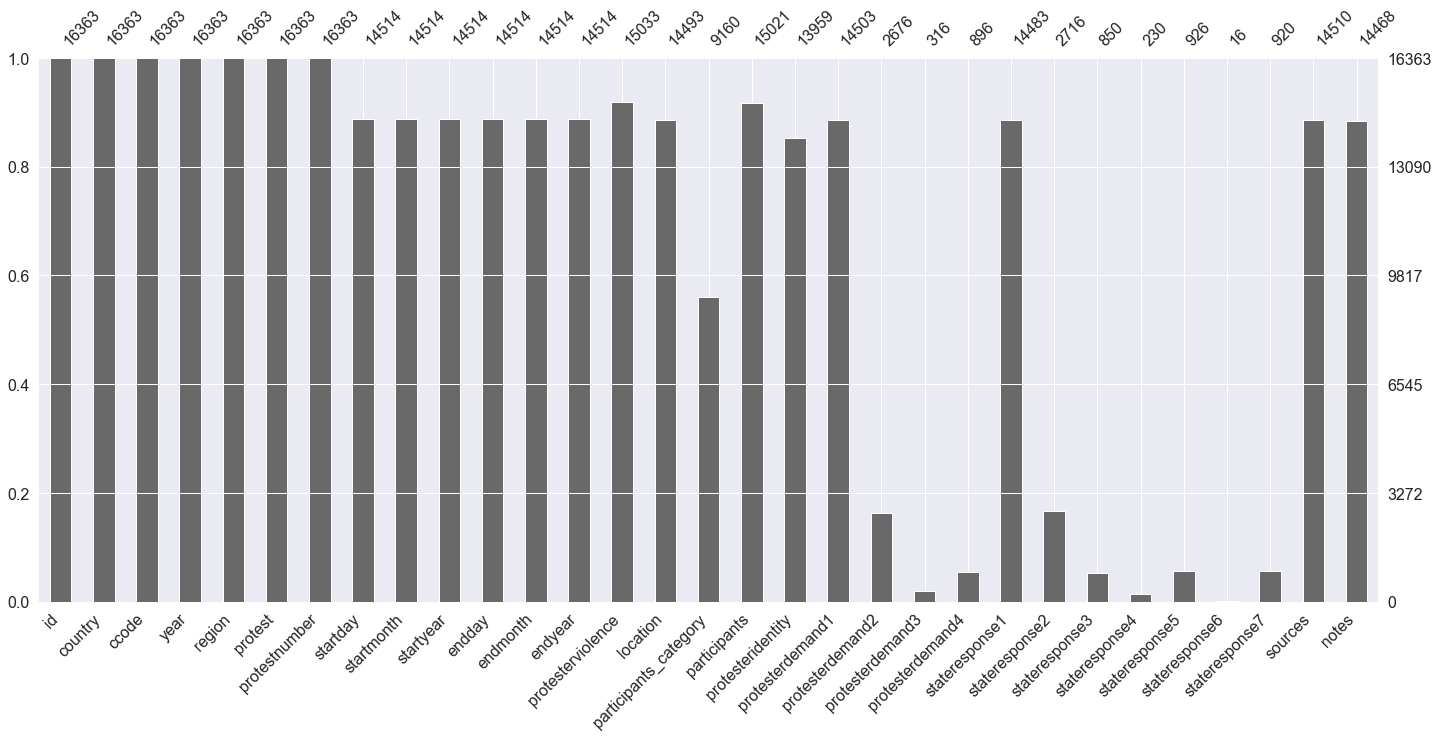

In [5]:
sns.set()
msno.bar(df);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 31 columns):
id                       16363 non-null int64
country                  16363 non-null object
ccode                    16363 non-null int64
year                     16363 non-null int64
region                   16363 non-null object
protest                  16363 non-null int64
protestnumber            16363 non-null int64
startday                 14514 non-null float64
startmonth               14514 non-null float64
startyear                14514 non-null float64
endday                   14514 non-null float64
endmonth                 14514 non-null float64
endyear                  14514 non-null float64
protesterviolence        15033 non-null float64
location                 14493 non-null object
participants_category    9160 non-null object
participants             15021 non-null object
protesteridentity        13959 non-null object
protesterdemand1         14503 non-null obje

In [7]:
categorical_columns = ['country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'protesterviolence',  'participants_category',
       'participants', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7']

numerical_columns = ['startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',]

id_columns = ['id','sources','notes', 'protesteridentity', 'location']

In [8]:
for column in categorical_columns:
    df[column].fillna('999', inplace=True)
for column in numerical_columns:
    df[column].fillna(999, inplace=True)

In [9]:
def bar_plot(df, columns):
    for category in columns:

        y_names = df[category].value_counts().index
        width = df[category].value_counts()

        plt.figure(figsize=(6,(len(y_names)/4)))
        plt.barh(y_names,width)
        plt.title('Category is: ' + category)
        plt.ylabel('category names')
        plt.xlabel('Number of values in a category')
        plt.show()

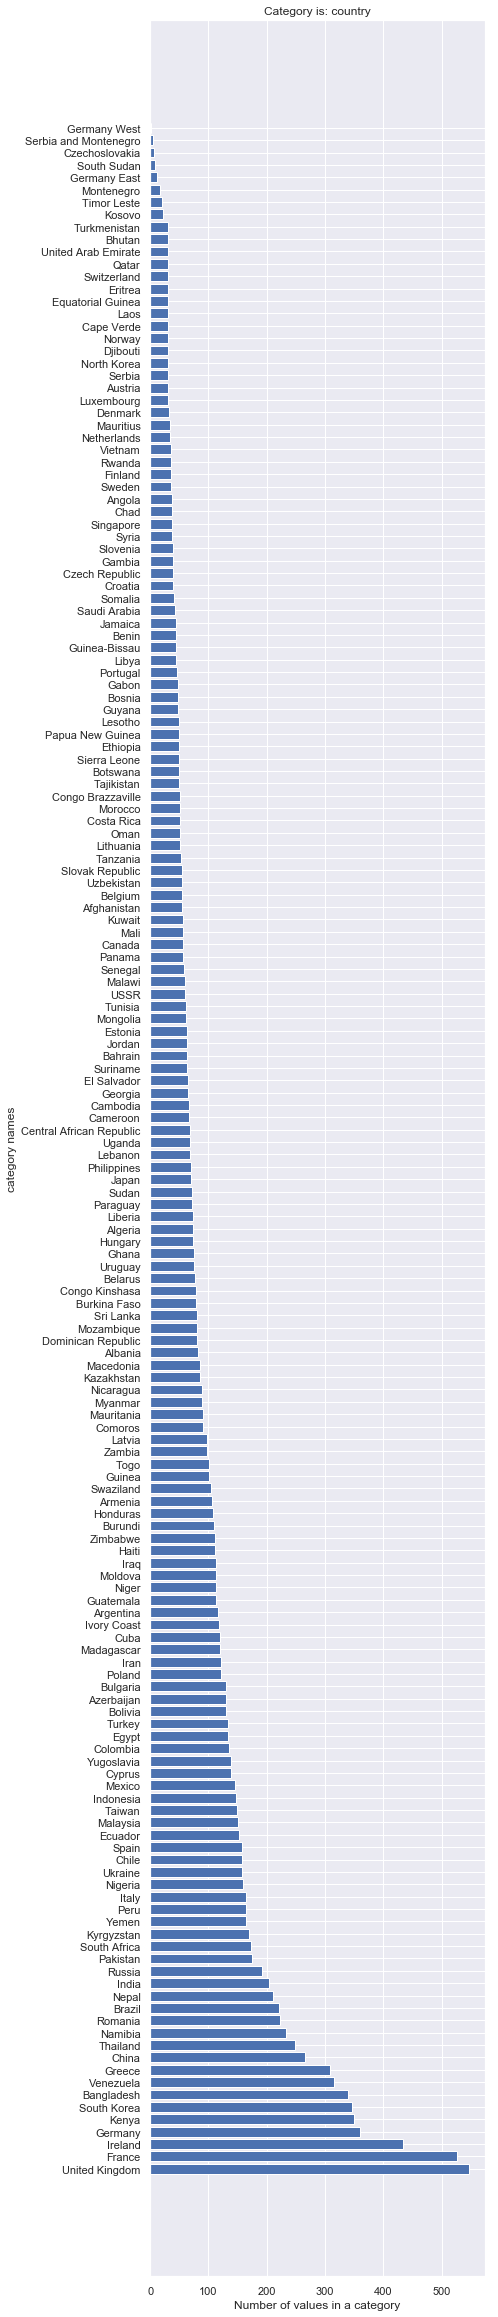

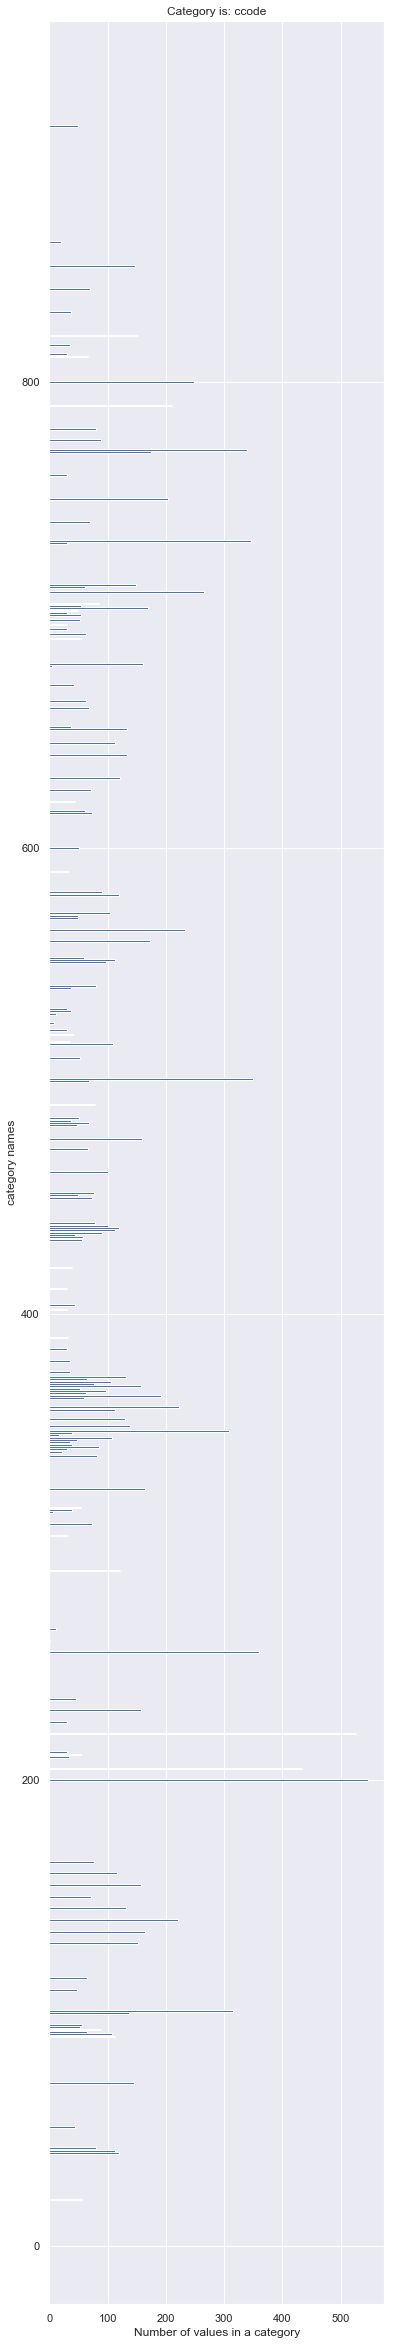

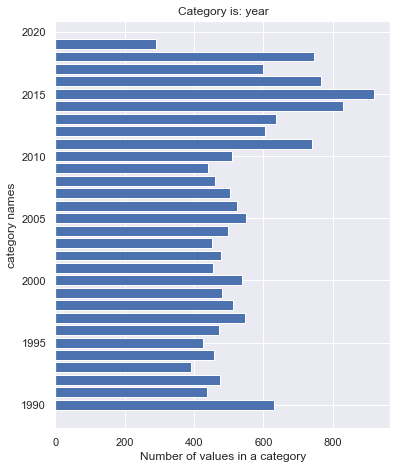

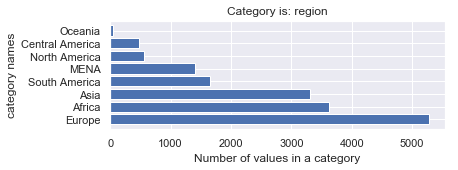

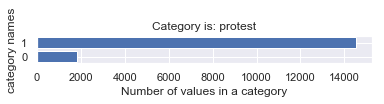

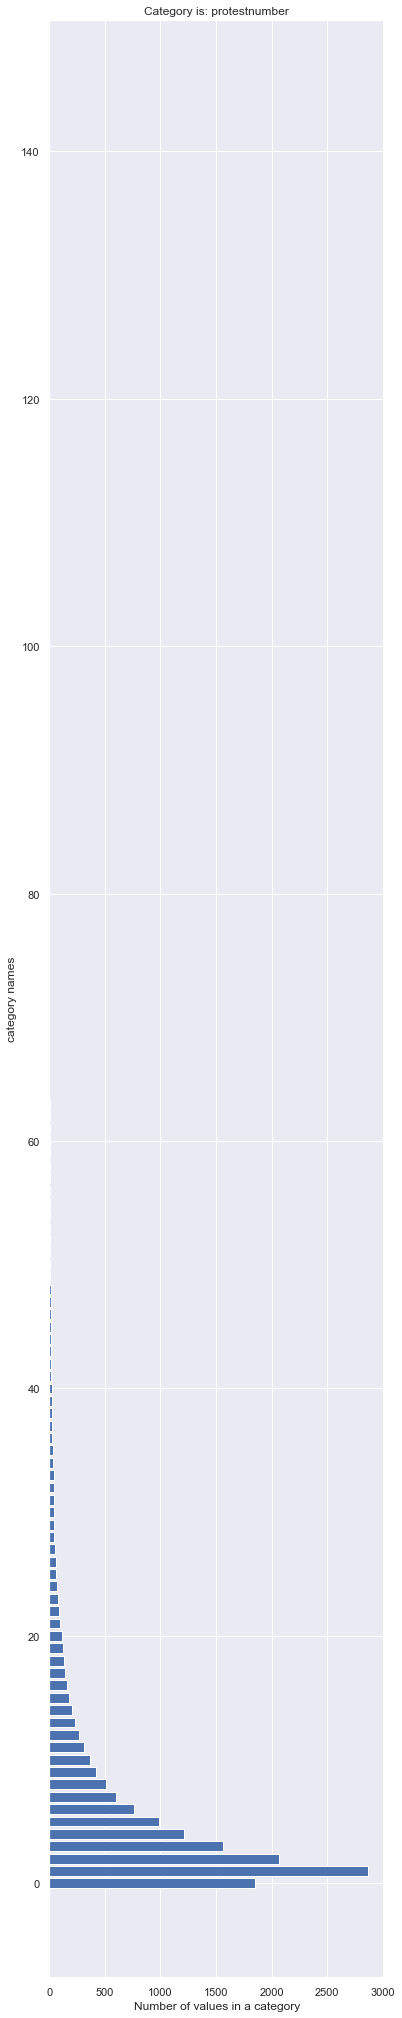

TypeError: unsupported operand type(s) for -: 'str' and 'float'

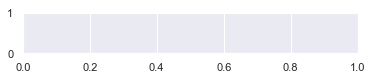

In [10]:
bar_plot(df, categorical_columns)

In [11]:
# Data engineering: length of protests
df['years'] = df['endyear'] - df['startyear']
df['months'] = df['endmonth'] - df['startmonth']
df['days'] = df['endday'] - df['startday']
df['total_days'] = df['days'] + (df['months']*30.5) + (df['years']*365)

In [12]:
protest_demands = ['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']
state_responses = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4','stateresponse5', 'stateresponse6', 'stateresponse7']

In [13]:
df = pd.get_dummies(df, columns=protest_demands, prefix="dem")
df = pd.get_dummies(df, columns=state_responses, prefix='resp')

In [14]:
df.head(2)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,resp_arrests,resp_beatings,resp_crowd dispersal,resp_killings,resp_.,resp_999,resp_accomodation,resp_arrests,resp_beatings,resp_killings
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,0,0,0,0,0,1,0,0,0,0
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,0,0,0,0,0,1,0,0,0,0


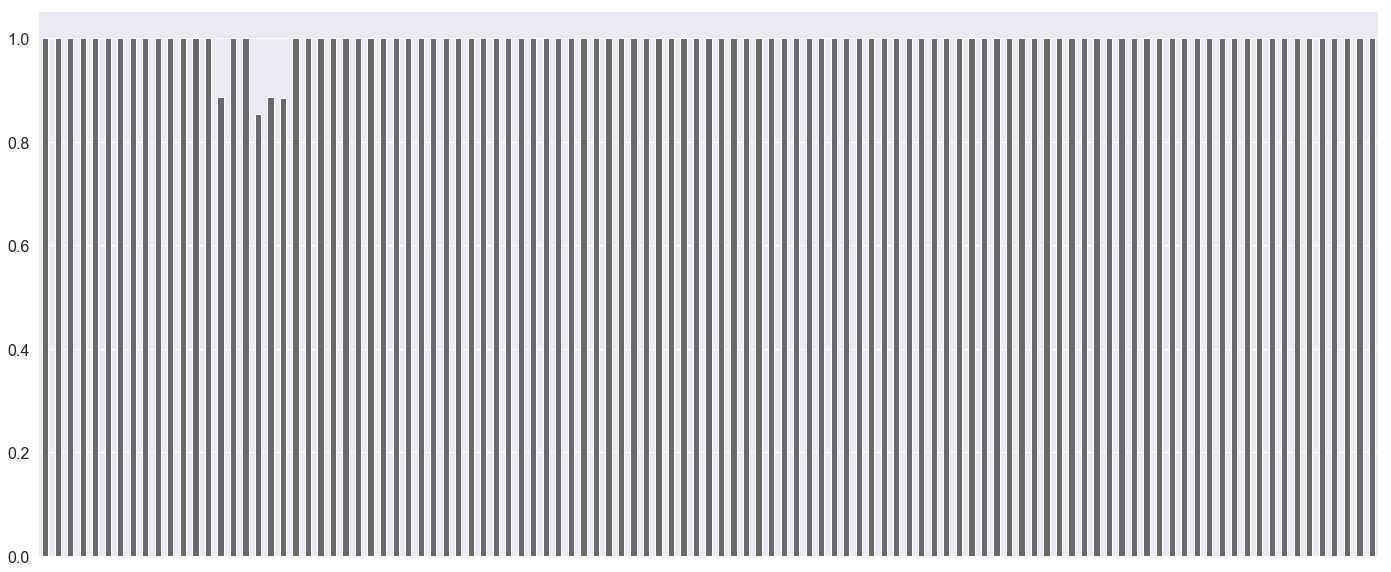

In [15]:
msno.bar(df);